### EDA: Exploratory Data Analysis.


Preprocessing:

    1. Missing Valus.
    2. Outliers handlings.
    3. scallings
    4. transformation
    5. encoding.
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('student.csv')

In [3]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
# basic profile of data
# top 5 rows
data.head()
# last 5 rows
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
# shape of data
data.shape


(1000, 8)

In [6]:
# segregate data like catagorical or Numarical, In Cat: Nominal or ordinal etc using Python
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# check the datatype of the column
data['gender']


0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object

In [8]:
data['gender'].dtypes  # perticularly datatype.


dtype('O')

In [9]:
data['gender'].dtype=='O'  # if datatype is string it calles Objects

True

In [10]:
# Check the Entire column names
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [11]:
#or to extract entire columns list
[fea for fea in data.columns]

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [12]:
# if condition to check catagorical feature


In [13]:
cat_col=[fea for fea in data.columns if data[fea].dtype=='O']

In [14]:
num_col=[fea for fea in data.columns if data[fea].dtype!='O']

In [15]:
cat_col


['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [16]:
data[num_col]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [17]:
# to check the data occupying the memory..
data.memory_usage()

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

### Missing Value

In [18]:
# find the missing value if any in the dataset
data.isnull()# False=Null value not present, True=Null Value.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [19]:
data.isnull().sum()# null values with count in each dataset column

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [20]:
data.isnull().sum().sum()  # over all count of null values present

0

In [21]:
# Check the data having duplicate values
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [22]:
# false Means no Duplicate values present

In [23]:
data.duplicated().sum()# No duplicate values in dataset total countis given here

0

In [24]:
# find Unique values in data set

In [25]:
data.nunique()  # NUnique for all columns to find values 

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [26]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [27]:
# Statistical analysis 


In [28]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [29]:
data.describe().T  # Rows =columns,columns=Rows

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [30]:
# corelation 
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


If we want to find the corelation between math score and reading score
or reading score and writting score.
math score increase as reading score increases..
or reading score increases as writting score increases.

its a positive corelation in both cases..

so we can conclude : if we are good reader, we are good writer

### Correlation 

Correlation is a statistical concept that measures the degree to which two or more variables are related or associated with each other. It helps us understand whether changes in one variable are associated with changes in another variable.

Types of Correlation:

Positive Correlation: When the values of two variables tend to increase or decrease together. In a positive correlation, as one variable increases, the other also tends to increase, and vice versa.
Negative Correlation: When one variable tends to increase as the other decreases, and vice versa. In a negative correlation, as one variable increases, the other tends to decrease.
No Correlation (Zero Correlation): When there is no apparent linear relationship between the two variables. Changes in one variable do not predict or explain changes in the other.
Correlation Coefficient:

The correlation coefficient is a numerical measure that quantifies the strength and direction of the linear relationship between two variables. It ranges from -1 to 1:

-1: Perfect negative correlation

0: No correlation

1: Perfect positive correlation

Commonly used correlation coefficients include the Pearson correlation coefficient (for linear relationships), Spearman rank correlation (for monotonic relationships), and Kendall tau rank correlation (also for rank-ordered data).

## Scatterplots:

Scatterplots are graphical representations of data points on a Cartesian plane, with one variable on the x-axis and the other on the y-axis. They are commonly used to visually assess the relationship between two variables. Positive correlations are often seen as points moving upwards from left to right, while negative correlations move downward.
Use Cases:

Correlation analysis is used in various fields, including economics, finance, social sciences, and natural sciences, to understand relationships between variables. For example, in finance, it's used to analyze the relationship between stock prices of different companies.

## Limitations:

Correlation only measures linear relationships. It may miss nonlinear associations between variables.
Correlation does not imply causation. Even if two variables are correlated, it doesn't mean that one causes the other. Confounding factors or coincidence can lead to spurious correlations.
Statistical Significance:

To determine whether a correlation coefficient is statistically significant (i.e., not due to random chance), hypothesis tests such as the t-test or the p-value are often used.

correlation is a fundamental statistical concept used to quantify the degree and direction of association between variables. It is a valuable tool for exploratory data analysis, hypothesis testing, and understanding relationships within datasets.


## Covariance

Covariance is a measure that tells us whether two things tend to go up or down together.

If the values of two things often increase together, their covariance is positive.
If one tends to go up when the other goes down, their covariance is negative.
If there's no clear pattern, the covariance is close to zero.

Think of it like this:

Positive covariance means they're friends, they move in the same direction.
Negative covariance means they're frenemies, when one is up, the other is down.
Zero covariance means they're like strangers; their movements don't seem related.





In [31]:
data.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


In [32]:
data.skew()  # To check the data is left skewed or right skewed..


math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

In [33]:
# this data is left skewed..


<AxesSubplot:xlabel='math score', ylabel='Density'>

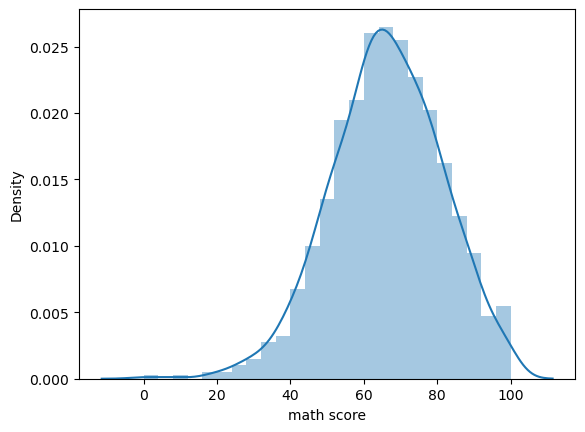

In [34]:
sns.distplot(data['math score'])

### Distribution 

#### Find the average of the columns in datasets.


In [35]:
data.columns  # list of columns  is dsplayed

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [36]:
data['Avarage']=(data['math score']+data['reading score']+data['writing score'])/3
# make one new column of name average.. and we are saving the values in it.


In [37]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [38]:
# perform Group by operation on dataset

In [39]:
data.groupby('gender').mean()

,math score,reading score,writing score,Avarage
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [40]:
data.groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarage
gender,,,,,,,,
female,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482


In [41]:
# assignment: find out number of students wh are haing less than 30 marks in maths
data[data['math score']<30]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarage
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
91,male,group C,high school,free/reduced,none,27,34,36,32.333333
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
327,male,group A,some college,free/reduced,none,28,23,19,23.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
363,female,group D,some high school,free/reduced,none,27,34,32,31.000000
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
528,female,group D,bachelor's degree,free/reduced,none,29,41,47,39.000000
601,female,group C,high school,standard,none,29,29,30,29.333333


In [42]:
# count the total num of students having maths marks less than 30
data[data['math score']<30].count()

gender                         14
race/ethnicity                 14
parental level of education    14
lunch                          14
test preparation course        14
math score                     14
reading score                  14
writing score                  14
Avarage                        14
dtype: int64

### Normal Distribution    

A normal distribution, often called a bell curve, is a way to describe how data is spread out. It's called "normal" because it's a common pattern you see in many things around us.

In a normal distribution:

Most data points cluster around the middle.
Fewer data points are found as you move away from the middle.
It looks like a symmetrical, bell-shaped curve when you plot it.
Think of it like the heights of people: most people are of average height, fewer people are much taller or much shorter, and very few are extremely tall or extremely short. That's a bit like a normal distribution.

#### P Value 

In simple terms, a p-value is a measure that tells you how strong the evidence is against a null hypothesis.

A small p-value (typically less than 0.05) suggests strong evidence against the null hypothesis. In other words, it suggests that there is something significant or real happening in your data.

A large p-value (greater than 0.05) suggests weak evidence against the null hypothesis. It indicates that the data you observed could have happened by random chance, and there may not be anything significant going on.

Think of it as a detective's report:

A small p-value means the evidence strongly points to a crime (rejecting the null hypothesis).
A large p-value means the evidence doesn't strongly support a crime (failing to reject the null hypothesis).
Remember, it's not a guarantee of absolute truth, just a measure of how strong the evidence is against a particular idea (the null hypothesis) in statistics.




User
what is normal distribution in simple and short
ChatGPT
A normal distribution, often called a bell curve, is a way to describe how data is spread out. It's called "normal" because it's a common pattern you see in many things around us.

In a normal distribution:

Most data points cluster around the middle.
Fewer data points are found as you move away from the middle.
It looks like a symmetrical, bell-shaped curve when you plot it.
Think of it like the heights of people: most people are of average height, fewer people are much taller or much shorter, and very few are extremely tall or extremely short. That's a bit like a normal distribution.


In [43]:
# we will check whether the data is normally distributed or ot with p value.
# data will be numarical col only.
data[num_col]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [44]:
data_num=data[num_col]

In [45]:
num_col

['math score', 'reading score', 'writing score']

In [46]:
data_num.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [47]:
from scipy.stats import normaltest

In [48]:
import scipy.stats

In [49]:
normaltest(data_num['math score'])

NormaltestResult(statistic=15.408960513931822, pvalue=0.00045080293869937836)

In [50]:
# Above we are getting two values 1. statistical value 
# and a p value.. p value is Non normally distributed.
# hence multiply by 100


In [51]:
normaltest(data_num['math score'])[1]*100  # [1] will give u the p value

0.04508029386993784

In [52]:
# condition is 
# if P value is > 0.05 then my data will be normal distributed
# p>0.5 Normally distributed.
# p<0.5 non normally distributed.

<AxesSubplot:xlabel='math score', ylabel='Density'>

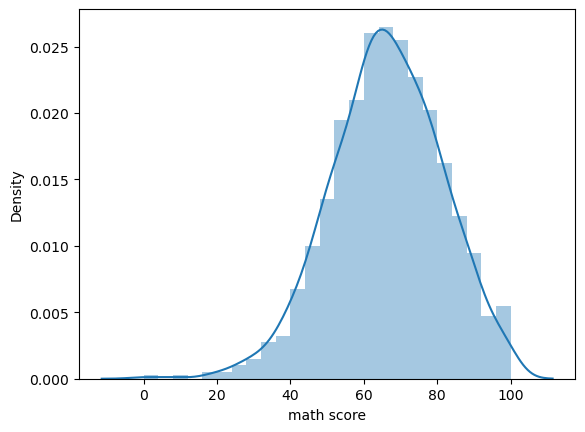

In [53]:
# if we check the data with distplot 
sns.distplot(data_num['math score'])

In [54]:
# Its slightly skewed towards left.hence our data is non normally distributed.

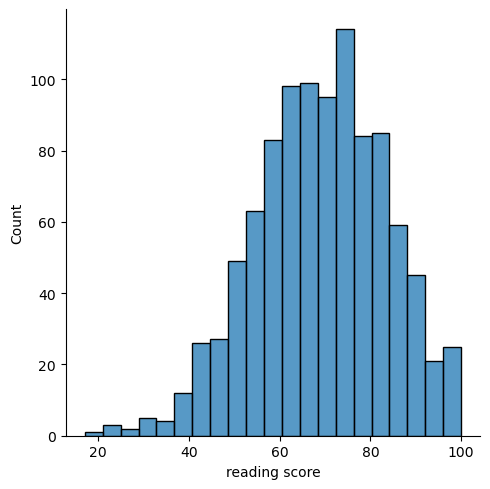

In [61]:
# Dist plot with respect to other columns.
sns.displot(data_num['reading score'])

<AxesSubplot:xlabel='writing score', ylabel='Density'>

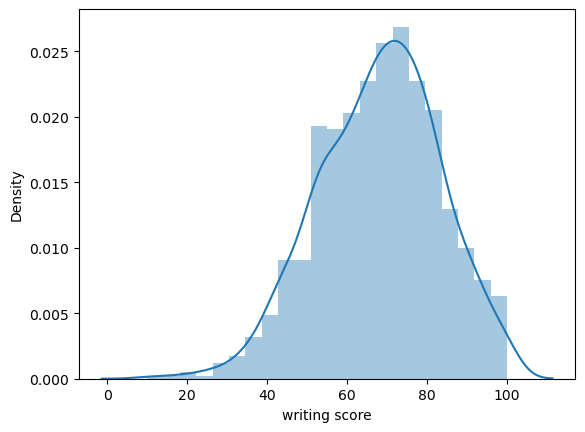

In [62]:
sns.distplot(data_num['writing score'])

##### Check the outliers 

To check the outliers we need to understand the cocept of Quantiles


##### Quantiles
A quantile is a statistical concept that divides a dataset into equal portions or subsets. Quantiles are used to understand the distribution of data and help identify specific data points' positions within that distribution. The most commonly used quantiles are quartiles, quintiles, deciles, and percentiles.

Here are some key types of quantiles:

Quartiles:

Quartiles divide a dataset into four equal parts, with each part containing 25% of the data.
The first quartile (Q1) represents the 25th percentile and divides the lowest 25% of the data from the rest.
The second quartile (Q2) represents the 50th percentile and is also known as the median, dividing the data into two equal halves.
The third quartile (Q3) represents the 75th percentile and divides the lowest 75% of the highest 25%.

Quartiles:
Quartiles divide a dataset into four equal parts, with each part containing 25% of the data.
The first quartile (Q1) represents the 25th percentile and divides the lowest 25% of the data from the rest.
The second quartile (Q2) represents the 50th percentile and is also known as the median, dividing the data into two equal halves.
The third quartile (Q3) represents the 75th percentile and divides the lowest 75% of the data from the highest 25%.

Percentiles:
Percentiles divide a dataset into 100 equal parts, with each part representing 1% of the data.
For example, the 25th percentile represents the value below which 25% of the data falls.
The median, or 50th percentile, is the value below which 50% of the data falls.

Quintiles:
Quintiles divide a dataset into five equal parts, with each part containing 20% of the data.
Quintiles are less commonly used than quartiles and percentiles but can be useful for more granularity in understanding data distribution.

Deciles:
Deciles divide a dataset into ten equal parts, with each part containing 10% of the data.
Decile Deciles are useful for finer-grained analysis of data distribution.
Quantiles are particularly valuable for understanding the spread of data, identifying outliers, and comparing specific data points to the overall distribution. They are often used in various fields, including statistics, finance, and data analysis, to make comparisons and draw conclusions about data variability and distribution characteristics.




#### Understanding it diagramatically

Quantiles are statistical divisions that split a dataset into equal portions. Visualizing quantiles can help you understand how data is distributed and where specific data points fall within that distribution. Let's use a simple diagram to explain quartiles (which divide data into four equal parts) as an example:

Consider a dataset of exam scores for a class of students:

Dataset: [60, 70, 75, 80, 85, 90, 95, 100]
To illustrate quartiles, we'll divide this dataset into four equal parts: Q1, Q2 (the median), Q3, and the minimum and maximum values.

Q1 (First Quartile): It's the 25th percentile, meaning it divides the lowest 25% of data from the rest. In our dataset, Q1 would be between the 25th and 26th values. In this case, it's between 70 and 75.

Q2 (Second Quartile): This is the median, which divides the dataset into two equal halves. It's between the 50th and 51st values. Here, it's between 85 and 90.

Q3 (Third Quartile): The 75th percentile, dividing the lowest 75% of data from the highest 25%. It's between the 75th and 76th values. In this case, it's between 95 and 100.

Now, let's create a simple diagram to represent this:

      |              Q1               |       Q2       |              Q3               |
      |              25%              |      50%       |              25%              |
      |              70               |      85       |              95               |
      |______________|______________|______________|

      60             75              90             100
      Min                             Max
In the diagram:

Q1 is the 25th percentile, so 25% of the data falls below it (between the minimum value and Q1).
Q2 (the median) is the 50th percentile, splitting the data exactly in half.
Q3 is the 75th percentile, so 75% of the data falls below it (between Q1 and Q3).
The vertical lines represent the quartiles, and the values below each line are the quartile values themselves.
The minimum and maximum values are also shown.
This diagram helps you visualize how quartiles divide the data and provides a quick summary of the distribution of values within the dataset.

##### Outliers

Outliers are data points that are significantly different or distant from the majority of the data in a dataset. They are values that are unusually extreme or distinct and do not conform to the typical pattern or distribution of the data. Outliers can occur in various types of data and may be the result of errors in data collection, measurement, or genuine extreme observations.

Here are some key characteristics of outliers:

1. Unusualness: Outliers are values that stand out as different or unusual when compared to the rest of the data. They can be exceptionally high or low.

2. Impact: Outliers can have a significant impact on statistical analyses and models. They can skew summary statistics, affect the accuracy of predictive models, and distort visualizations.

3. Causes:

     1. Natural Outliers: Some outliers represent legitimate extreme observations in the data. For example, in a dataset of  
        income levels, the income of a billionaire might be a natural outlier.

     2. Measurement Errors: Outliers can also result from errors in data collection, recording, or measurement. These are often         called "erroneous outliers."

     3. Data Entry Errors: Typographical errors or mistakes during data entry can lead to outliers

     4. Data Transformation: Outliers may emerge when data is transformed or scaled

     5. Detection: Outliers can be identified through various methods, including visual inspection of data plots (e.g., box 
        plots or scatterplots), statistical tests (e.g., the Z-score or the IQR method), and machine learning techniques.

4. Treatment: Depending on the context and the cause of the outliers, they can be handled in different ways:

    1. Preservation: In some cases, outliers represent important information and should be retained for analysis.
    2. Transformation: Data can be transformed (e.g., by taking the logarithm) to reduce the impact of outliers.
    3. Removal: Outliers can be removed from the dataset if they are deemed erroneous and likely to distort results.
    4. Winsorization: Instead of removing outliers, values beyond a certain threshold can be replaced with the nearest 
       non-outlying value.

Outliers are important to consider in data analysis and modeling because they can indicate data quality issues, suggest interesting phenomena, or impact the validity of statistical conclusions. The approach to handling outliers should be carefully chosen based on the specific goals of the analysis and the nature of the data.



Certainly, let's use a simple diagram to explain outliers. Imagine we have a dataset of exam scores for a class of students:

 
Dataset: [60, 70, 75, 80, 85, 90, 95, 100, 150]


In this dataset, most students scored between 60 and 100, but there's one student who scored 150. Let's visualize this with a box plot, which is a common way to identify outliers:

 
          |   |   |   |   |   |   |   |       |
          |---|---|---|---|---|---|---|-------|-----
          60 70  75 80  85 90  95 100    150

In the box plot:

The box represents the interquartile range (IQR), which covers the middle 50% of the data (from Q1 to Q3, where Q1 is the 25th percentile and Q3 is the 75th percentile).

    The horizontal line inside the box is the median (Q2), which is the middle value of the dataset.
    The "whiskers" extend from the box to the minimum and maximum values within 1.5 times the IQR.
    Any data points outside the whiskers are considered potential outliers.
    In our dataset, the value 150 is outside the whiskers, making it an outlier. 
    It's significantly different from the rest of the data and stands out in the plot.

So, outliers are data points that are unusually far from the majority of the data, as indicated by the box plot. They can skew summary statistics, distort the distribution, and may warrant further investigation to determine whether they are genuine extreme values or the result of errors.

<AxesSubplot:xlabel='math score'>

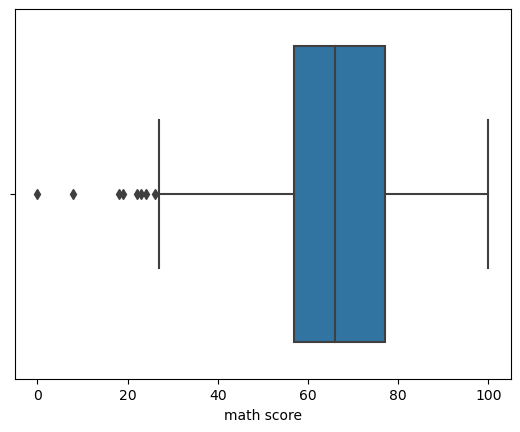

In [55]:
sns.boxplot(data['math score'])

<AxesSubplot:>

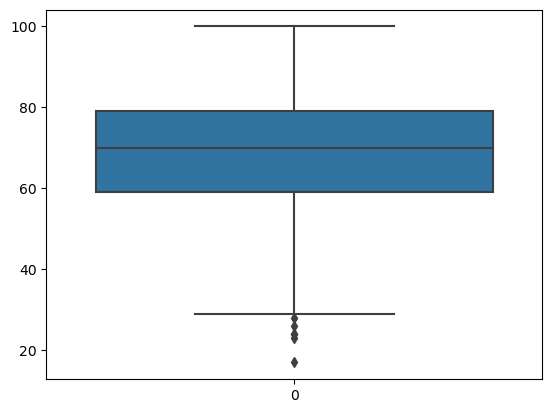

In [56]:
sns.boxplot(data=data['reading score'])

<AxesSubplot:>

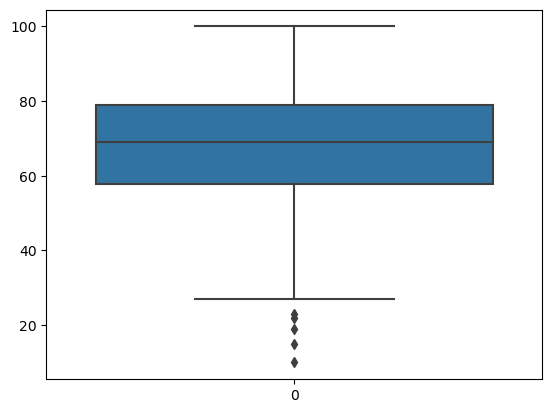

In [59]:
sns.boxplot(data=data['writing score'])

In the dstribution plot we can observe that plot is skewed to left
it means outliers are at the negitive side.

In box plot as well we can observe the values or outliers are at negitive side..



In [63]:
data['math score'].quantile(0.10)
# we will check the dataa with first quantile Q1
i.e. 10 % of the data we are checking..

47.0

In [64]:
# we will check the data with last quantile 
data['math score'].quantile(0.90)

# we are checking 90 % of the data.

86.0

In [65]:
# check the min value
data['math score'].min()

0

In [66]:
data['math score'].max()

100

so our 
    first Q1 Quantile will contain 0.10 = 0 to 47 values will be there.
    third quantile Q3 will contain  0.90 = 0 to 86 values will be there.
    
    with this
    IQR=Q3-Q1=86-47=39
    upper limit=Q3+(1.5*IQR)
               =86+(1.5*39)
               =144.5
               
    with above this +ve value we will get the outliers.
    
    lower limit=Q1-(1.5*IQR)
               =47-(1.5*39)
               =-11.5
    the value below this -ve value will be considered as outliers.
      


In [67]:
# lets implement it in python
Q1=data['math score'].quantile(0.10)# u can take .25,.30 as well 
Q3=data['math score'].quantile(0.90)
IQR=Q3-Q1
Upper_limit=Q3+(1.5*IQR)
Lower_limit=Q1-(1.5*IQR)



In [68]:
Upper_limit

144.5

In [69]:
Lower_limit

-11.5

In [71]:
data[data['math score']<Lower_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarage


In [72]:
data[data['math score']>Upper_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarage


In [73]:
# with these we are not able to trim outliers.
#so change teh data liit of 0.10 to 0.25 & 0.90 to .75

In [74]:
Q1=data['math score'].quantile(0.25) 
Q3=data['math score'].quantile(0.75)
IQR=Q3-Q1
Upper_limit=Q3+(1.5*IQR)
Lower_limit=Q1-(1.5*IQR)


In [75]:
print(Upper_limit)
print(Lower_limit)

107.0
27.0


In [76]:
data[data['math score']>Upper_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarage


In [77]:
data[data['math score']<Lower_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarage
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
787,female,group B,some college,standard,none,19,38,32,29.666667
842,female,group B,high school,free/reduced,completed,23,44,36,34.333333
980,female,group B,high school,free/reduced,none,8,24,23,18.333333


In [78]:
# hence with the lower limit as 27 as Q1 we got above values as outliers below 27 value.

In [79]:
# lets us access the values using code.
def outlier_threshold(df,variable):
    q1=df[variable].quantile(0.25)
    q3=df[variable].quantile(0.75)
    iqr=q3-q1
    up_lmt=q3+(1.5*iqr)
    low_lmt=q1-(1.5*iqr)
    return low_lmt,up_lmt

In [80]:
data_num.columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [82]:
for variable in data_num.columns:
    low_lmt,up_lmt=outlier_threshold(data_num,variable)

In [91]:
def replace_with_threshold(data,numeric_col):
    for variable in data_num.columns:
        low_lmt,up_lmt=outlier_threshold(data_num,variable)
        data.loc[data[variable]<low_lmt,variable]=low_lmt
        data.loc[data[variable]>low_lmt,variable]=up_lmt

In [84]:
replace_with_threshold(data_num,data_num.columns)

In [87]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [89]:
def identifying_treating_outliers(df,col,remove_or_fill_with_quartile):
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  lower_fence=q1-1.5*(iqr)
  upper_fence=q3+1.5*(iqr)
  if remove_or_fill_with_quartile=="drop":
    df.drop(df.loc[df[col]<lower_fence].index,inplace=True)
    df.drop(df.loc[df[col]>upper_fence].index,inplace=True)
  elif remove_or_fill_with_quartile=="fill":
    df[col] = np.where(df[col] < lower_fence, lower_fence, df[col])
    df[col] = np.where(df[col] > upper_fence, upper_fence, df[col])



# Like wise we can reach outliers.
